In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [37]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID'] 
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


In [38]:
spectra['sampleID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177])

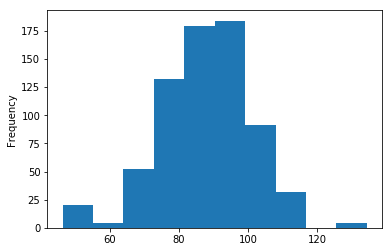

In [39]:
spectra['target'].plot.hist()

In [40]:
#spectra = spectra[spectra['target'] < 100]
spectra.shape

(698, 293)

# Dataset clean ?

In [41]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,87.867001,88.361032,35.075930,34.089405,33.118207,32.248728,31.512126,30.961026,30.527884,30.184520,...,0.642378,0.717119,0.779950,0.821864,0.881985,0.945085,1.006667,1.069775,1.134070,1.199629
std,13.327779,51.000422,2.030035,2.060834,2.089150,2.111065,2.129829,2.145836,2.150767,2.153461,...,0.686442,0.693758,0.699668,0.704813,0.711064,0.717485,0.724458,0.731790,0.738503,0.745828
min,46.333333,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,80.000000,44.250000,34.081783,33.112638,32.129796,31.271699,30.559600,30.006750,29.585270,29.244950,...,0.238126,0.316725,0.373221,0.403003,0.462925,0.522936,0.587332,0.652647,0.715998,0.776902
50%,88.000000,88.000000,35.383537,34.404322,33.446087,32.584858,31.861850,31.307280,30.874285,30.531601,...,0.632675,0.710483,0.777476,0.820467,0.884216,0.946825,1.012075,1.078114,1.142786,1.210467
75%,96.000000,132.000000,36.358374,35.383751,34.438153,33.573155,32.844104,32.324157,31.889494,31.551481,...,1.084671,1.158659,1.218695,1.270178,1.330560,1.392627,1.460363,1.528732,1.594301,1.659343
max,134.333333,177.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [42]:
spectra.isnull().sum().sum()

0

In [43]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Columns: 293 entries, target to 1530
dtypes: float64(292), int64(1)
memory usage: 1.6 MB


# Possible outliers cleaning

In [44]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 293)

# Target description

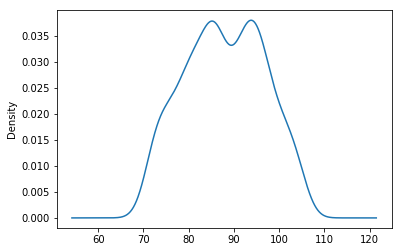

In [45]:
spectra['target'].plot.density()

In [46]:
# The closer to 0, the better
spectra['target'].skew()


-0.031504138888319426

In [47]:
from scipy.special import inv_boxcox
from scipy import stats
spectra['targetBC'], lmbda = stats.boxcox(spectra['target'])

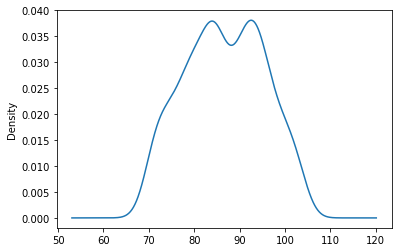

-0.031632930989971296

In [48]:
spectra['targetBC'].plot.density()
plt.show()
spectra['targetBC'].skew()

# SampleID  aggregation

In [49]:
spectra[['target']].describe()

,target
count,591.000000
mean,87.928652
std,8.783686
min,71.000000
25%,81.000000
50%,87.333333
75%,94.666667
max,104.666667


OrderedDict([(0.0, 71.0), (0.25, 81.0), (0.5, 87.33333333333331), (0.75, 94.66666666666669), (1.0, 104.66666666666669)])


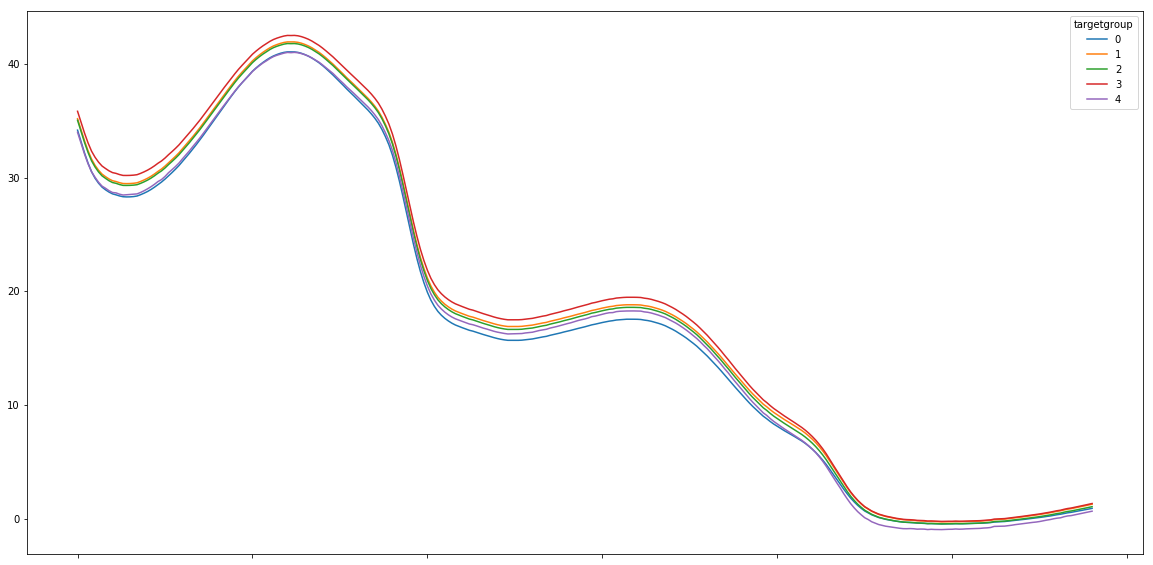

In [50]:
import collections
groupnumber = 5
# defines quant group
quants = spectra['target'].quantile(np.linspace(0, 1, groupnumber)).to_dict()
print(collections.OrderedDict(sorted(quants.items())))
def quantplacement(entry):
    index = -1
    for key,value in collections.OrderedDict(sorted(quants.items())).items():
        if entry < value:
            return index
        index += 1
    return index
        
spectra['targetgroup']=spectra['target'].apply(quantplacement)
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').mean().T.plot(figsize=(20,10))
plt.show()


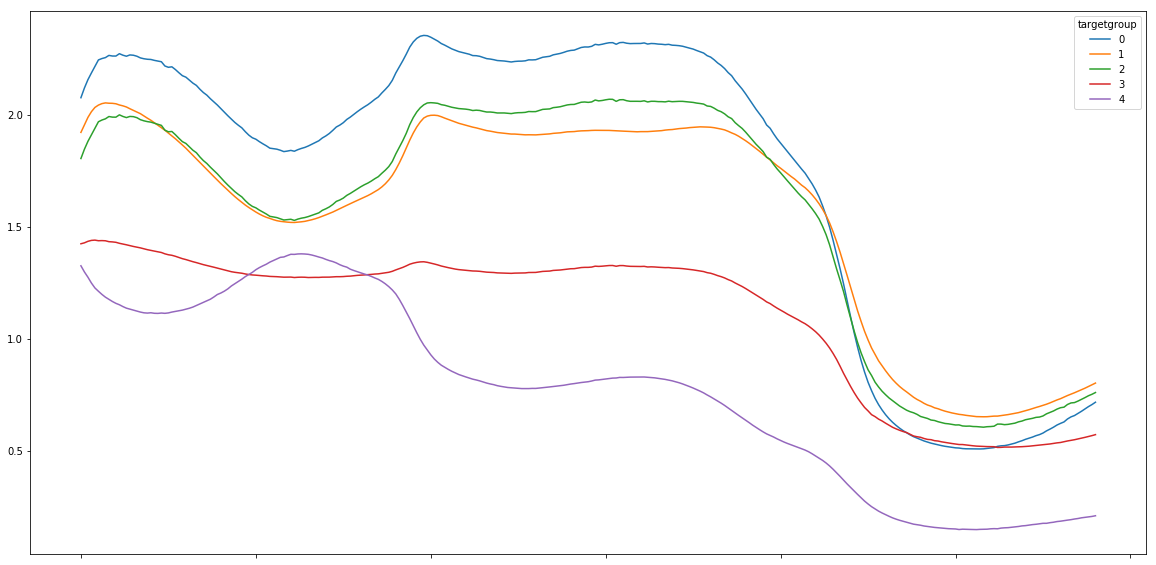

In [51]:
#Standard deviation
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').std().T.plot(figsize=(20,10))

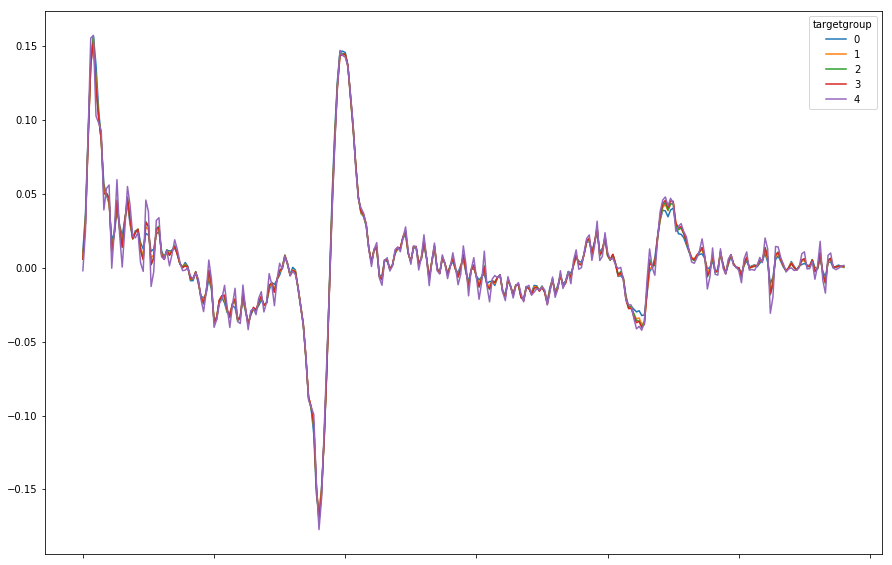

In [52]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

def gradient(entry):
    #print(entry)
    return np.gradient(np.gradient(entry))

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

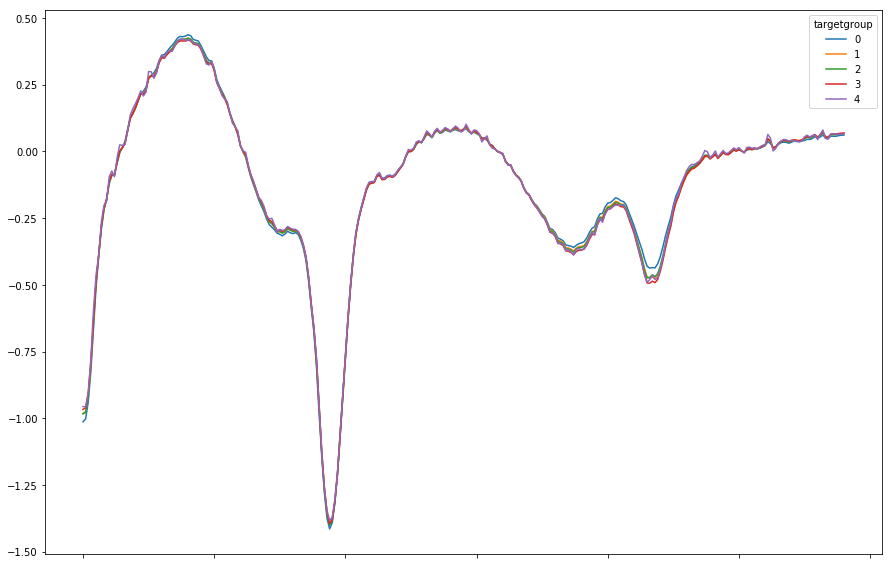

In [53]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

def gradient(entry):
    #print(entry)
    return np.gradient(entry)

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

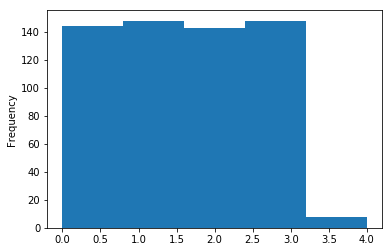

In [54]:
spectra['targetgroup'].plot.hist(bins = groupnumber)

In [55]:
spectra[spectra['targetgroup']==groupnumber-1]

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
550,104.666667,140,34.647984,33.670601,32.682674,31.814377,31.096958,30.592859,30.145847,29.795107,...,0.634059,0.670364,0.737094,0.810439,0.880395,0.948833,1.016546,1.083668,103.360491,4
551,104.666667,140,34.234165,33.311920,32.377419,31.552559,30.869392,30.387072,29.956377,29.616903,...,0.494504,0.527758,0.592042,0.661595,0.726018,0.791471,0.855048,0.923750,103.360491,4
552,104.666667,140,31.956987,31.054888,30.145386,29.345482,28.686649,28.228344,27.816227,27.495508,...,0.206279,0.236270,0.295920,0.361172,0.422018,0.481201,0.540008,0.605116,103.360491,4
553,104.666667,140,32.288803,31.360378,30.418793,29.595940,28.917799,28.443398,28.023672,27.696703,...,0.050413,0.080668,0.140813,0.203911,0.265813,0.329829,0.388363,0.444130,103.360491,4
570,104.666667,145,35.911911,34.918598,33.929260,33.040726,32.307068,31.798397,31.338205,30.975163,...,0.205192,0.231127,0.293279,0.361459,0.426671,0.490741,0.554189,0.625119,103.360491,4
571,104.666667,145,34.999714,34.025970,33.052509,32.186222,31.473162,30.980991,30.542759,30.199951,...,0.257069,0.286211,0.351100,0.420408,0.489397,0.558257,0.624882,0.699085,103.360491,4
572,104.666667,145,33.745316,32.794510,31.847389,31.002329,30.310143,29.840420,29.413689,29.079769,...,0.283101,0.309535,0.370812,0.437627,0.502103,0.566591,0.627711,0.694917,103.360491,4
573,104.666667,145,34.076981,33.079758,32.086838,31.198103,30.466848,29.964396,29.517660,29.168741,...,0.133066,0.158609,0.218217,0.281833,0.345472,0.409715,0.471238,0.530228,103.360491,4


In [56]:
spectra['target'].value_counts().idxmax()

83.66666666666667

In [57]:
df = spectra[spectra['target'] == 92]
df.shape

(12, 295)

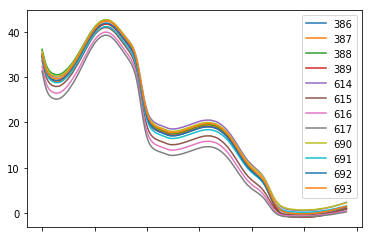

In [58]:
df[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [59]:
df['sampleID']

386     98
387     98
388     98
389     98
614    156
615    156
616    156
617    156
690    176
691    176
692    176
693    176
Name: sampleID, dtype: int64

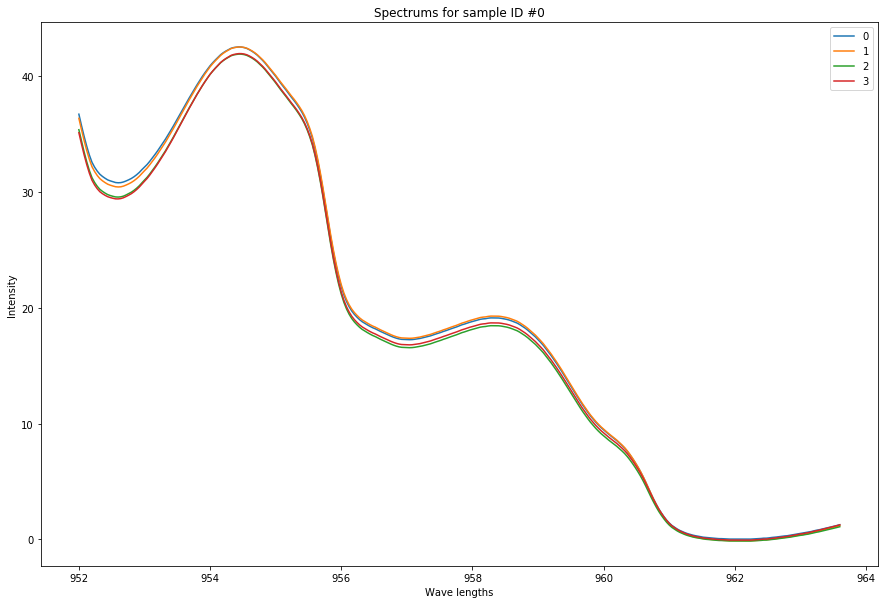

In [60]:
subset = spectra[spectra['sampleID'] == 0]
fig, ax = plt.subplots()
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot(figsize=(15,10), ax=ax)
plt.title('Spectrums for sample ID #0')
plt.xlabel('Wave lengths')
ax.set_xticklabels([str(x) for x in range(950, 1530+1,2)])
plt.ylabel('Intensity')
plt.show()

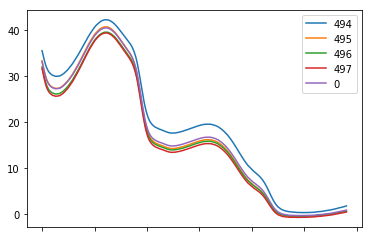

In [61]:
subset = spectra[spectra['sampleID'] == 125]
subset = subset.append(subset.mean(axis=0).to_frame().T, ignore_index=False)
subset[[str(x) for x in range(950, 1530+1,2)]].T.plot()

In [62]:
subset

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
494,81.666667,125.0,35.460346,34.499405,33.548050,32.703560,31.990824,31.461008,31.034462,30.698778,...,1.401844,1.439325,1.497910,1.561933,1.622716,1.683509,1.744230,1.812403,80.44377,1.0
495,81.666667,125.0,33.286423,32.221680,31.171883,30.244602,29.463644,28.885019,28.433910,28.080521,...,0.372864,0.395162,0.438904,0.487497,0.532387,0.577512,0.622316,0.671066,80.44377,1.0
496,81.666667,125.0,31.953867,30.907152,29.874184,28.967979,28.205471,27.639858,27.196039,26.848068,...,0.375828,0.398887,0.442004,0.490820,0.535841,0.580593,0.625828,0.667300,80.44377,1.0
497,81.666667,125.0,31.612619,30.532179,29.469980,28.536695,27.753347,27.176903,26.723646,26.368385,...,0.184700,0.210626,0.255134,0.305136,0.352943,0.400680,0.448569,0.492650,80.44377,1.0
0,81.666667,125.0,33.078314,32.040104,31.016024,30.113209,29.353322,28.790697,28.347014,27.998938,...,0.583809,0.611000,0.658488,0.711346,0.760972,0.810574,0.860235,0.910855,80.44377,1.0


# Regression

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [64]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [65]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, params={}, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.params = params
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        return df.apply(lambda x:savgol_filter(x, **self.params), axis=1)
    
savgol = Savgol(params={'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(591, 291)

In [66]:
class Gradientplus(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        return df.apply(lambda x:np.gradient(x), axis=1)
    
gradient = Gradientplus()
savgol.fit_transform(spectra).shape

(591, 291)

In [67]:
#df = pd.DataFrame([[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9],[2, 2, 5, 2, 1, 0, 1, 4, 9]])
#gradient.fit_transform(df)

## Column selection

In [68]:
class Colselect(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[]):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.columns]

#colselect = Colselect(['sampleID'])
#colselect.fit_transform(spectra).shape

## Blocs creation

In [69]:
savgol = Savgol({'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(591, 291)

In [70]:
colselect = Colselect([str(x) for x in range(950, 1530+1,2)])
colselect.fit_transform(spectra).shape

(591, 291)

In [71]:
gradient = Gradientplus()
gradient.fit_transform(spectra).shape

(591, 291)

In [72]:
from sklearn.pipeline import make_union
union = make_union(colselect, gradient) 
union.fit_transform(spectra).shape

(591, 582)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
from sklearn.decomposition import PCA
pca = PCA(whiten=False)

In [75]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 5)

In [76]:
union2 = make_union(pca, lle) 

In [77]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

## Pipe creation

In [78]:


#lrpipelist = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
lrpipelist = [('savgol', savgol), ('union', union), ('scaler', scaler), ('union2', union2), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler), ('elnet', elnet)]
lrpipe = Pipeline(lrpipelist)

In [67]:
params={
        'elnet__alpha':np.logspace(-6,-2,3),
        'elnet__l1_ratio':np.linspace(1e-5,1,3),
       }

In [68]:
lrgrid = GridSearchCV(lrpipe, params, cv=kf, scoring='neg_mean_squared_error', verbose=1, n_jobs=-2)
lrgrid.fit(spectra,spectra['targetBC'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-2)]: Done  45 out of  45 | elapsed:   32.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('savgol', Savgol(columns=['950', '952', '954', '956', '958', '960', '962', '964', '966', '968', '970', '972', '974', '976', '978', '980', '982', '984', '986', '988', '990', '992', '994', '996', '998', '1000', '1002', '1004', '1006', '1008', '1010', '1012', '1014', '1016', '1018', '1020', '10...e=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'elnet__alpha': array([1.e-06, 1.e-04, 1.e-02]), 'elnet__l1_ratio': array([1.00000e-05, 5.00005e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [69]:
lrgrid.best_score_

-16.324672540740902

In [70]:
lrgrid.best_params_

{'elnet__alpha': 0.01, 'elnet__l1_ratio': 1e-05}

In [71]:
#bestparams = {k[8:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('kridge__')}
#kridge = KernelRidge(**bestparams)

bestparams = {k[7:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('elnet__')}
elnet = ElasticNet(random_state=0, max_iter=10000, **bestparams)

lrpipelist = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler),  ('kridge', kridge)]
lrpipe = Pipeline(lrpipelist)
cross_val_score(lrpipe, spectra,spectra['targetBC'], cv=kf, scoring='neg_mean_squared_error').mean()

-16.911559587167723

In [72]:
preds = cross_val_predict(lrpipe, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

16.460534267480224

In [73]:
mean_squared_error(ypred, spectra['target'])**.5

4.057158398125494

### HyperOpt

In [74]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [75]:
counter = 0
bestscore = 1e20

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
    
    #print(hyperparams)
    
    elnet = ElasticNet(**hyperparams)

    #pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('union2', union2), ('elnet', elnet)]
    #pipe = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    regpip = Pipeline(pipe)    
    
    preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 10 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    'alpha': hp.loguniform('alpha', -6, 2),
    'l1_ratio': hp.loguniform('l1_ratio',-6, 0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

1 - RMSECV 4.442847790394102 - {'alpha': 0.06715207831583732, 'l1_ratio': 0.005162321415606113, 'random_state': 0, 'max_iter': 10000}
2 - RMSECV 4.084771429389962 - {'alpha': 0.012187972990741291, 'l1_ratio': 0.022177265779319662, 'random_state': 0, 'max_iter': 10000}
10 - RMSE 5.636502784944814
11 - RMSECV 4.069935071087534 - {'alpha': 0.009341848823735052, 'l1_ratio': 0.031044367233467825, 'random_state': 0, 'max_iter': 10000}
12 - RMSECV 3.9934586468713835 - {'alpha': 0.004391961948472418, 'l1_ratio': 0.1394962062884862, 'random_state': 0, 'max_iter': 10000}
14 - RMSECV 3.9821657830679116 - {'alpha': 0.00855403429009383, 'l1_ratio': 0.017921226834487828, 'random_state': 0, 'max_iter': 10000}
15 - RMSECV 3.917731521166597 - {'alpha': 0.0027692081555926555, 'l1_ratio': 0.08985288555053056, 'random_state': 0, 'max_iter': 10000}
20 - RMSE 5.037012030359409
30 - RMSE 4.241251037493937
40 - RMSE 4.1333823320286465
50 - RMSE 5.743690266957632
60 - RMSE 5.2280006339264355
70 - RMSE 4.033378

In [76]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
params# = {'alpha': 0.0025463439947105786, 'l1_ratio': 0.9987487227563826, 'max_iter': 10000, 'random_state': 0}

{'alpha': 0.003965407832344563,
 'l1_ratio': 0.018035999423506338,
 'max_iter': 10000,
 'random_state': 0}

In [77]:
#params = {'alpha': 0.0025463439947105786, 'l1_ratio': 0.9987487227563826, 'max_iter': 10000, 'random_state': 0}

In [78]:
elnet = ElasticNet(**params)
pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

15.801616481152605

In [79]:
mean_squared_error(ypred, spectra['target'])**.5

3.9751247126540075

## Coeff verification

In [80]:
regpip.fit(spectra,spectra['targetBC'])
regpip.named_steps['elnet'].coef_[:20]

array([-0.13661016,  0.2882701 , -0.23420812,  0.02792501, -0.58077809,
        0.58226427, -0.28709021, -0.36942033,  0.37393781, -1.19326527,
       -3.73552641,  2.53710546,  2.39008195, -0.68660044,  1.43513274,
       -2.33898573, -0.02454815,  0.83637494, -0.18203788, -0.86596774])

In [81]:
regpip.named_steps['elnet'].coef_.max()

4.4929900738963084

In [82]:
regpip.named_steps['elnet'].coef_.min()

-4.5716300483828345

## Score accuracy

In [83]:
df = pd.DataFrame({'target':spectra['target'], 'pred':ypred, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],}) #
df.head()

,pred,sampleID,target,targetgroup
0,90.632076,0,94.333333,2
1,94.881003,0,94.333333,2
2,97.927215,0,94.333333,2
3,96.196764,0,94.333333,2
4,75.790049,1,76.333333,0


In [84]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampleID,target,targetgroup,delta,deltaabs
0,90.632076,0,94.333333,2,3.701258,3.701258
1,94.881003,0,94.333333,2,-0.547669,0.547669
2,97.927215,0,94.333333,2,-3.593881,3.593881
3,96.196764,0,94.333333,2,-1.863431,1.863431
4,75.790049,1,76.333333,0,0.543284,0.543284


In [85]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 591
prediction +/- 1.0 : percent 18.61 %
prediction +/- 2.0 : percent 35.36 %
prediction +/- 3.0 : percent 53.98 %
prediction +/- 4.0 : percent 66.67 %
prediction +/- 6.0 : percent 86.13 %
prediction +/- 8.0 : percent 95.60 %
prediction +/- 10.0 : percent 99.66 %


In [86]:
df[['delta']].describe()

,delta
count,591.000000
mean,0.037054
std,3.978319
min,-11.887655
25%,-2.783511
50%,-0.234591
75%,2.748896
max,11.966621


In [87]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


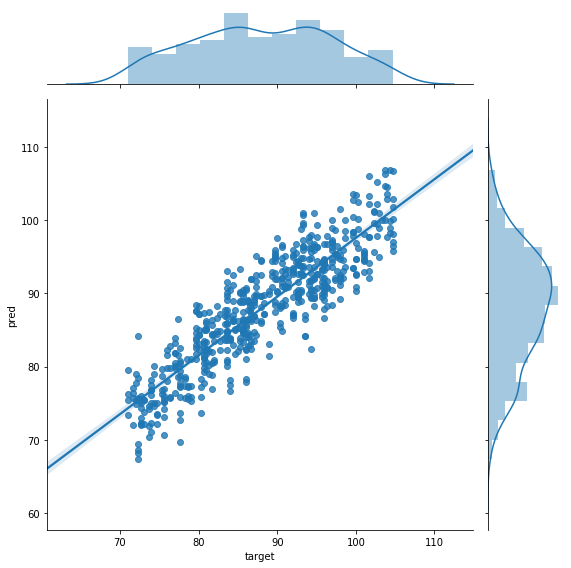

In [88]:

sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8, stat_func=None)
plt.show()

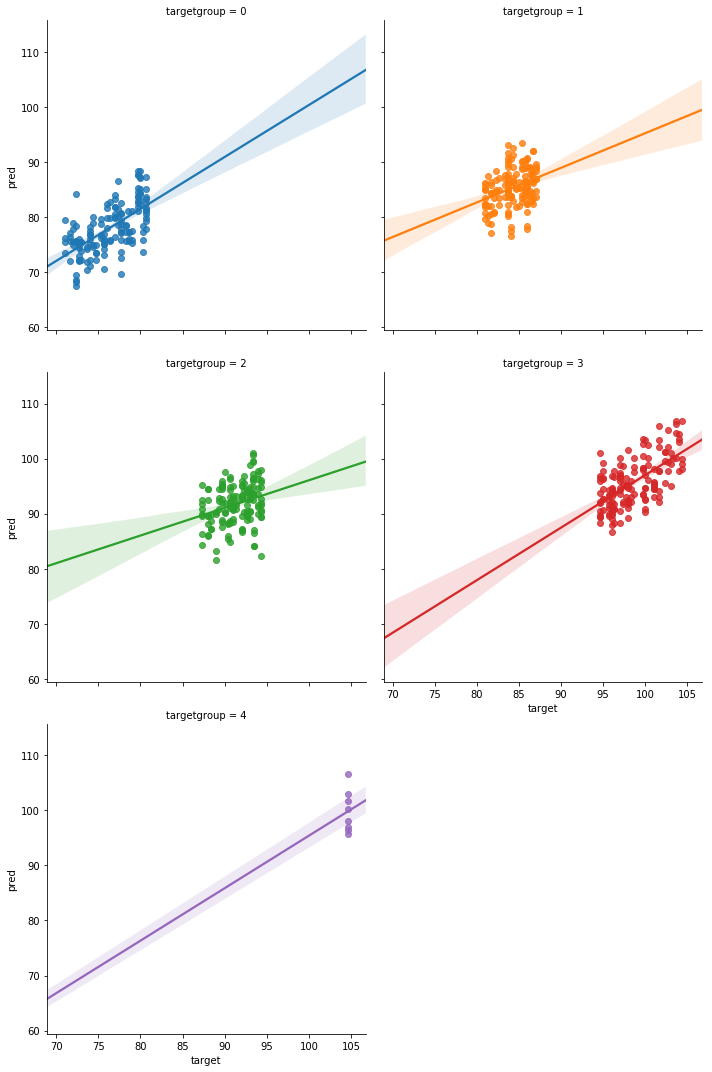

In [89]:
sns.lmplot(x='target',
           y='pred',
           col='targetgroup',
           hue='targetgroup',
           data=df,
           aspect=1,
           col_wrap=2,
           size=5,
           legend=True)
plt.show()

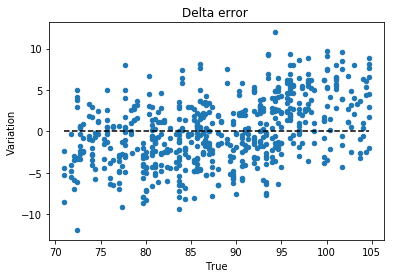

,delta
count,591.000000
mean,0.037054
std,3.978319
min,-11.887655
25%,-2.783511
50%,-0.234591
75%,2.748896
max,11.966621


In [90]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

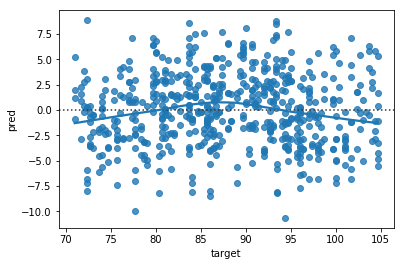

In [91]:
sns.residplot(x='target', y='pred', data=df, lowess=True)

In [81]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge()

In [113]:
counter = 0
bestscore = 1e20
#pipelist = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', pca)]
pipelist = [('savgol', savgol), ('union', union), ('scaler', scaler), ('union2', union2)]
pipekrr = Pipeline(pipelist)

Xtrans = pipekrr.fit_transform(spectra)

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'gamma': params['gamma'],
        'alpha': params['alpha'],
        'kernel': params['kernel'],
        'degree': params['degree'],
        #'max_iter':10000,
        }
    
    #print(hyperparams)
    
    krr = KernelRidge(**hyperparams)
  
    
    #preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf, n_jobs=-2)
    #score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    preds = cross_val_predict(krr, Xtrans, spectra['target'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , preds)
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    
    if counter % 10 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    'gamma': hp.loguniform('gamma', -3, 1),
    'alpha': hp.loguniform('alpha',-3, 0),
    'kernel':hp.choice('kernel', ['poly']), #
    'degree':hp.choice('degree', [2,3]),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

1 - RMSECV 40.724071383319036 - {'gamma': 0.05306102476194296, 'alpha': 0.20318038146094947, 'kernel': 'poly', 'degree': 3}
2 - RMSECV 8.624722528309992 - {'gamma': 0.13347402417739998, 'alpha': 0.11552342874814221, 'kernel': 'poly', 'degree': 2}
4 - RMSECV 4.781957981787914 - {'gamma': 0.05177969030042548, 'alpha': 0.1408717875117036, 'kernel': 'poly', 'degree': 2}
10 - RMSE 64.58876098585652
20 - RMSE 78.55239204886406
30 - RMSE 4.65035966290854
30 - RMSECV 4.65035966290854 - {'gamma': 0.052601962107899296, 'alpha': 0.21638111476969685, 'kernel': 'poly', 'degree': 2}
36 - RMSECV 4.476729571685373 - {'gamma': 0.04978797801069969, 'alpha': 0.27207610612683153, 'kernel': 'poly', 'degree': 2}
40 - RMSE 23.591969773927275
50 - RMSE 70.23323861963195
60 - RMSE 54.93718990163312
70 - RMSE 5.595987527955249
80 - RMSE 7.074305304078178
90 - RMSE 78.33861268220552
100 - RMSE 24.36104828922351
110 - RMSE 37.34411838789238
120 - RMSE 73.83264452040446
130 - RMSE 60.41805322124007
140 - RMSE 51.2

In [114]:
params = {
        'alpha': best['alpha'],
        'gamma': best['gamma'],
        'kernel': 'poly',
        'degree':2,
        }
params

{'alpha': 0.27207610612683153,
 'degree': 2,
 'gamma': 0.04978797801069969,
 'kernel': 'poly'}

In [79]:
params = {'alpha': 0.27207610612683153,
 'degree': 2,
 'gamma': 0.04978797801069969,
 'kernel': 'poly'}

In [82]:
krr = KernelRidge(**params)
#pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('pca', pca), ('krr', krr)]
pipe = [('savgol', savgol), ('union', union), ('scaler', scaler), ('union2', union2), ('krr', krr)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra, spectra['target'], cv=kf)
mean_squared_error(spectra['target'], preds)**.5

4.8051831413908594

In [83]:
df = pd.DataFrame({'target':spectra['target'], 'pred':preds, 'targetgroup':spectra['targetgroup'], 'sampleID':spectra['sampleID'],})
df['delta'] = df['pred'] - df['target']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampleID,target,targetgroup,delta,deltaabs
0,100.247150,0,94.333333,2,5.913816,5.913816
1,95.777628,0,94.333333,2,1.444295,1.444295
2,95.792971,0,94.333333,2,1.459637,1.459637
3,97.403349,0,94.333333,2,3.070016,3.070016
4,79.029083,1,76.333333,0,2.695749,2.695749


/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


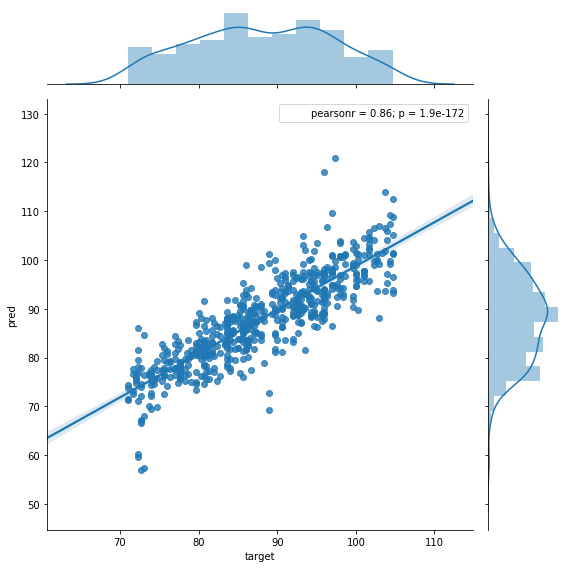

In [84]:
import seaborn as sns
sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8)
plt.show()

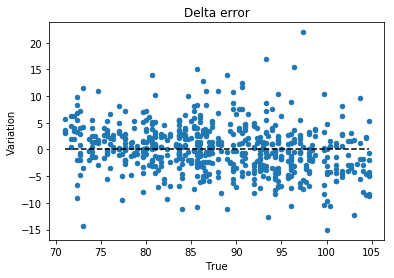

,delta
count,591.000000
mean,0.122428
std,4.628275
min,-15.067125
25%,-2.826905
50%,0.045406
75%,2.772408
max,21.953725


In [118]:
df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()

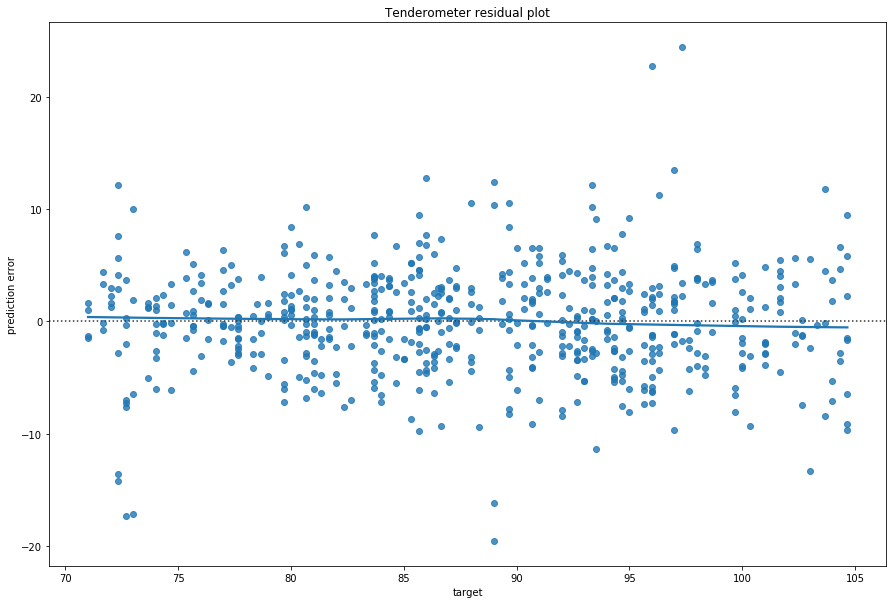

In [100]:
fig, ax =plt.subplots(figsize=(15, 10))
sns.residplot(x='target', y='pred', data=df, lowess=True, ax=ax, )
plt.title('Tenderometer residual plot')
plt.ylabel('prediction error')

plt.show()

In [120]:
df['delta'].max()

21.953725431877217

In [121]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 591
prediction +/- 1.0 : percent 19.97 %
prediction +/- 2.0 : percent 38.41 %
prediction +/- 3.0 : percent 54.15 %
prediction +/- 4.0 : percent 66.67 %
prediction +/- 6.0 : percent 83.76 %
prediction +/- 8.0 : percent 91.37 %
prediction +/- 10.0 : percent 95.43 %
